In [2]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [9]:
for _ in train_data[0]:
  print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
None
None
story
direction
None
really
None
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
None
None
as
myself
so
i
loved
the
fact
there
was
a
real
None
with
this
film
the
None
None
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
None
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
None
None
was
amazing
really
None
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
None
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
None
that
played
the
None
of
None
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
None
i
think
because
the
stars
that
play
them
all
None
up
are
such
a
big
None
for
the
whole
film
but
these
children
are
amazing
and
should
be
None
for
what
they
have
done
don't
you
think
the
whole
story
was
s

In [10]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [11]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [12]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
x_val = x_train[:10000]
partial_x_val = x_train[10000:]

y_val = y_train[:10000]
partial_y_val = y_train[10000:]


In [16]:
history = model.fit(partial_x_val, partial_y_val,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6737 - loss: 0.6204 - val_accuracy: 0.8224 - val_loss: 0.4631
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8426 - loss: 0.4261 - val_accuracy: 0.8477 - val_loss: 0.3801
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8580 - loss: 0.3598 - val_accuracy: 0.8585 - val_loss: 0.3483
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8680 - loss: 0.3290 - val_accuracy: 0.8600 - val_loss: 0.3399


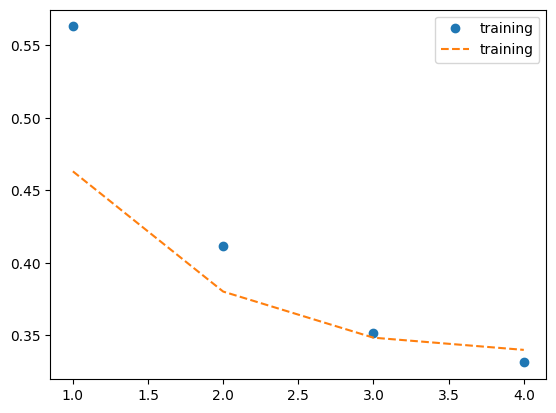

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'training')
plt.legend()
plt.show()


In [23]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8538 - loss: 0.3453


[0.3418765366077423, 0.8571199774742126]

In [25]:
history_dict

{'accuracy': [0.7476000189781189,
  0.8475333452224731,
  0.8610000014305115,
  0.8693333268165588],
 'loss': [0.5567638874053955,
  0.40261486172676086,
  0.3512168526649475,
  0.3239905536174774],
 'val_accuracy': [0.8349999785423279,
  0.8436999917030334,
  0.8555999994277954,
  0.8571000099182129],
 'val_loss': [0.443267285823822,
  0.3810713589191437,
  0.346813440322876,
  0.34039855003356934]}